### 📦 Library & Function Imports – Explained

#### 🐼 pandas
- `pandas as pd`  
  Used for data manipulation and analysis using DataFrames and Series.

#### 🔢 numpy
- `numpy as np`  
  Supports numerical operations on arrays, matrices, and mathematical functions.

#### 🎨 seaborn
- `seaborn as sns`  
  A statistical data visualization library built on top of matplotlib.

#### 📊 matplotlib
- `matplotlib.pyplot as plt`  
  Used for creating static, animated, and interactive plots in Python.

---

#### 🧪 train_test_split
- `from sklearn.model_selection import train_test_split`  
  Splits the dataset into training and testing sets for machine learning.

#### 🤖 LogisticRegression
- `from sklearn.linear_model import LogisticRegression`  
  Implements logistic regression for binary/multiclass classification problems.

#### 🧍‍♂️ KNeighborsClassifier
- `from sklearn.neighbors import KNeighborsClassifier`  
  A classification algorithm based on feature similarity (K-Nearest Neighbors).

#### 📏 accuracy_score, classification_report, confusion_matrix
- `from sklearn.metrics import ...`  
  Provides performance metrics to evaluate model predictions.

---

#### 🧼 StandardScaler
- `from sklearn.preprocessing import StandardScaler`  
  Standardizes features by removing the mean and scaling to unit variance.

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

<h1>Load the Dataset</h1>

In [5]:
df = pd.read_csv('/Users/shreeyadaga/Documents/college/Sem6/DSBDA/DSBDALExam DataSets/DSBDALExam DataSets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h1>Data Cleaning - Removing NA, ?, Negative values etc.</h1>

In [8]:
# True nulls (NaN) values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<hr>
df.apply() - calls the given function on each column of the dataframe<br>
pd.numeric(x, errors='coerce') - tries to convert every value in that series to a number <br>
&emsp; 'coerce' - If number can't be parsed(its a string) - It turns into NaN

In [10]:
#df['trestbps'] = pd.to_numeric(df['trestbps'],errors = 'coerce')
#df['chol'] = pd.to_numeric(df['chol'],errors='coerce') 
#df['fbs'] = pd.to_numeric(df['fbs'],errors='coerce')
#df['thalach'] = pd.to_numeric(df['thalach'],errors='coerce')
#df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
#df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
#df['slope'] = pd.to_numeric(df['slope'], errors='coerce')
#df['thal'] = pd.to_numeric(df['thal'], errors='coerce')


# .apply - applies to whole dataframe
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<hr>
.fillna(df[].median()) - computes median of non-missing values in a column<br>
&emsp;Replaces only the NaN entries with the aggregate value<br>

<hr>
.replace() - replace values<br>
&emsp;Every -9 is replaces with NaN

In [12]:
# fill numeric chol with its median
# df["chol"] = df["chol"].fillna(df["chol"].median())
df.replace(-9, np.nan, inplace=True)

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
for col in df.columns:
    # Check if there are *any* negative values in that column
    if (df[col] < 0).any():
        # If so, keep only the rows where that column is >= 0
        df = df[df[col] >= 0]
print("After removing negatives:", df.shape)

After removing negatives: (1025, 14)


<h1>Error correcting(Outlier detection and removal)</h1>

## Box Plot

A way to visualize the distribution of one or more groups of numeric data - highlighting its central tendency, spread, potential outliers - all in single graphic<br> 
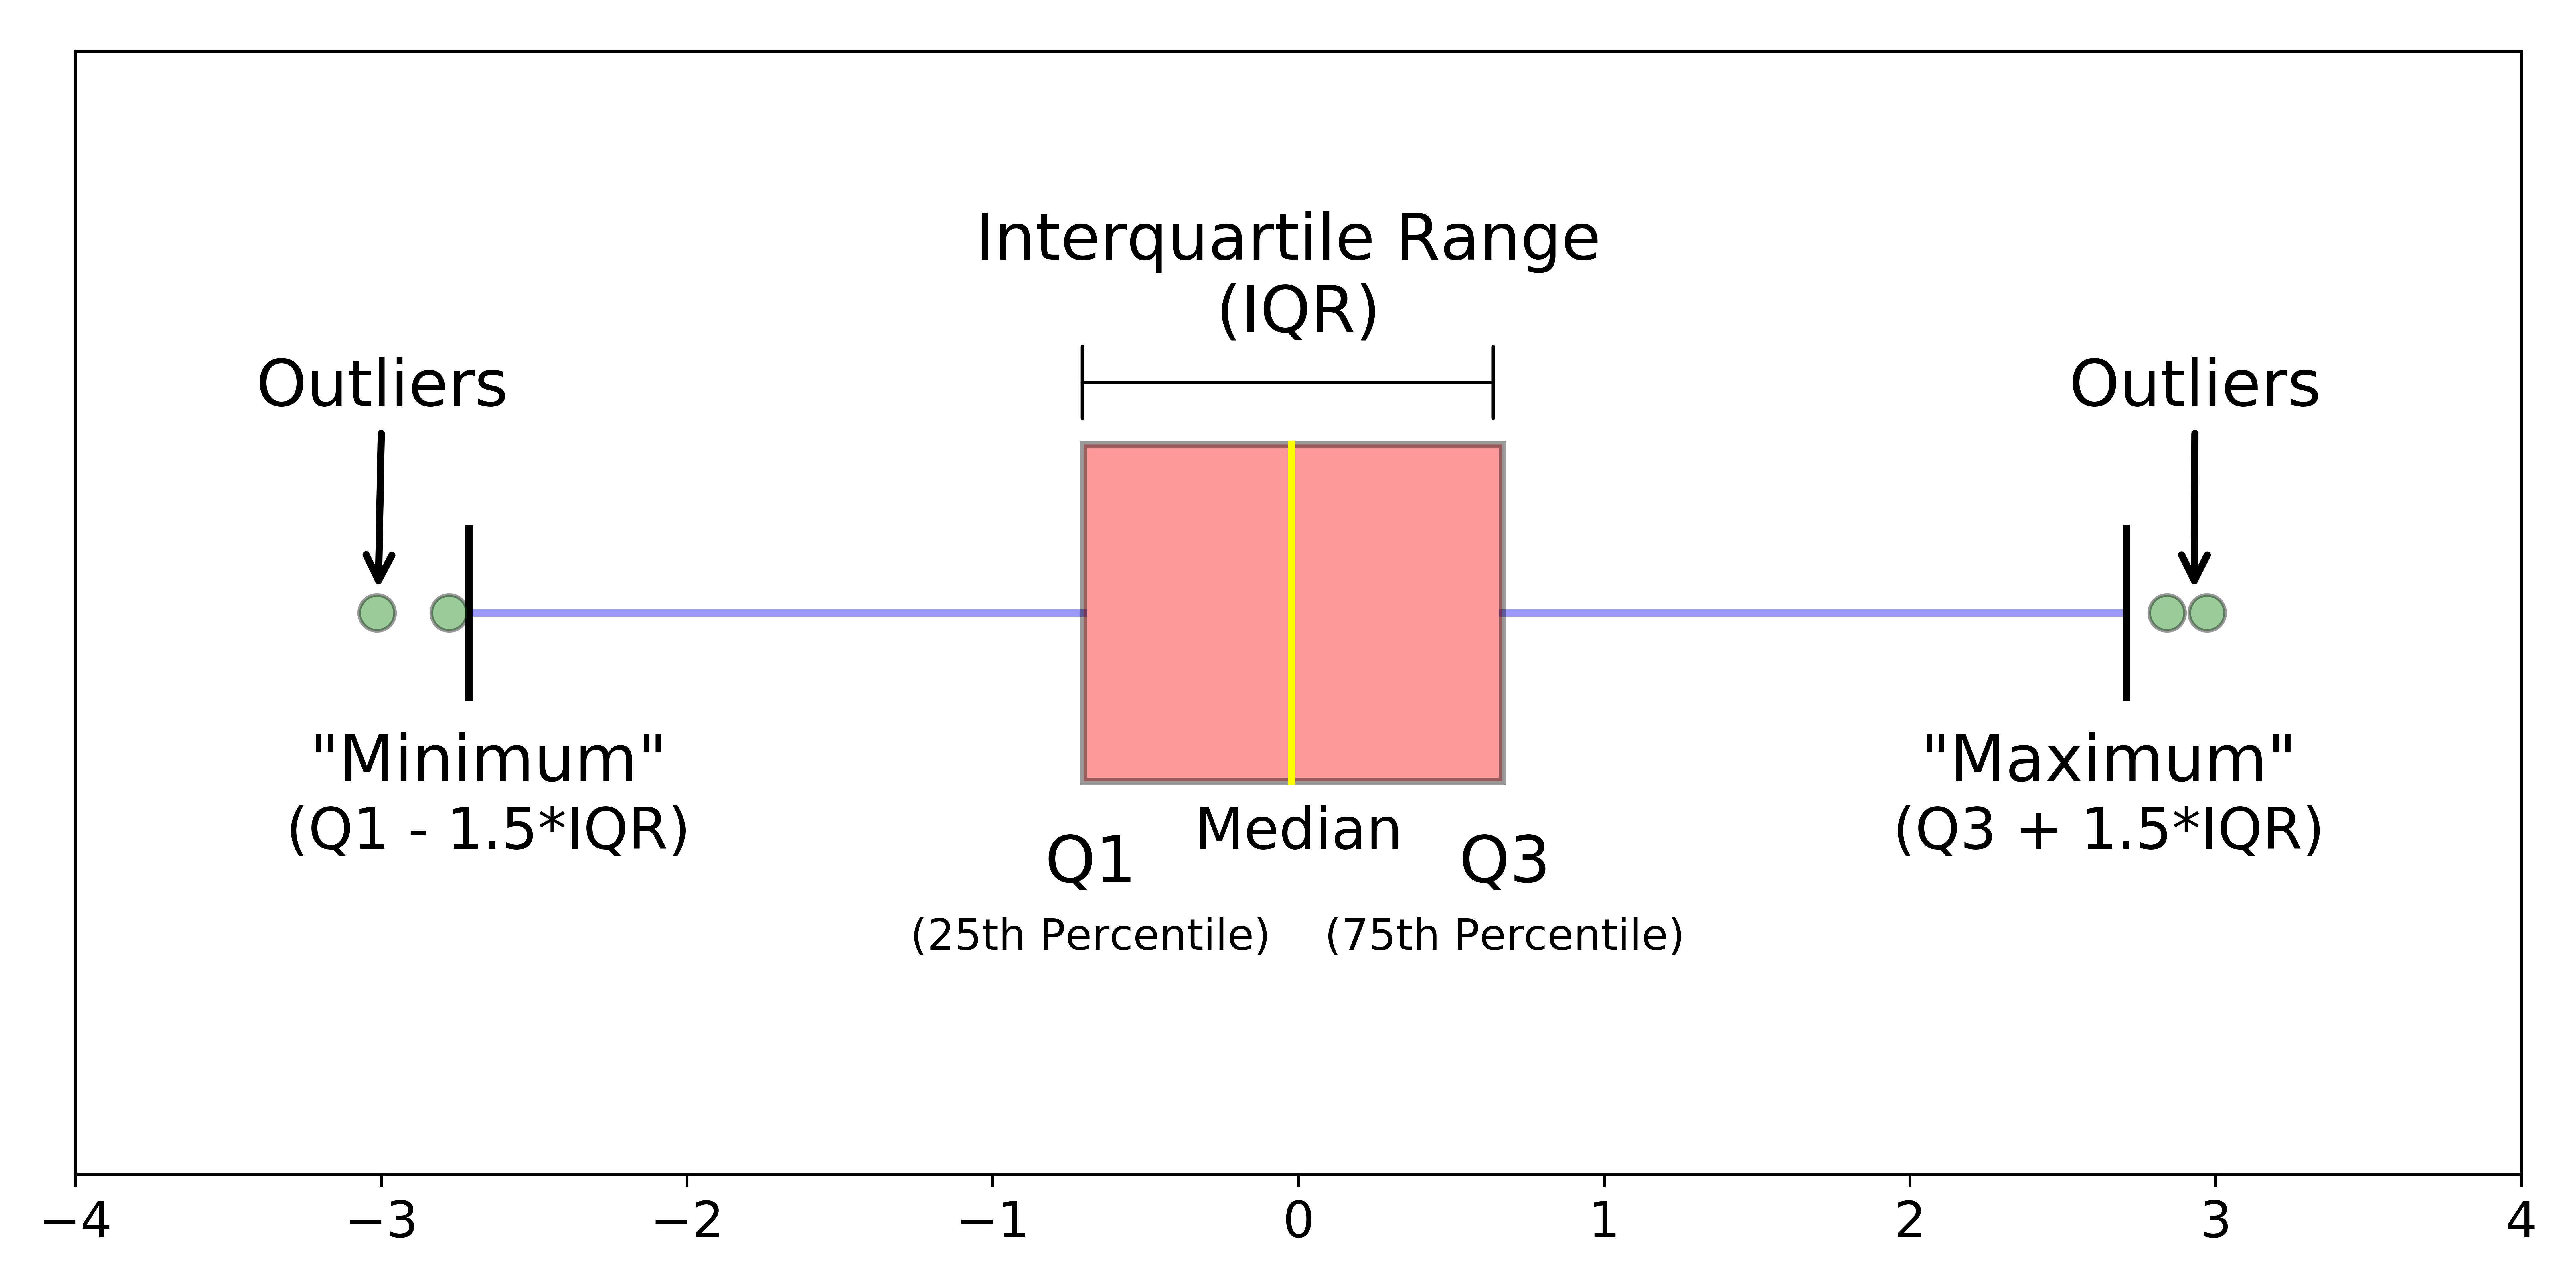


<br> 
1. The Box <br>
    &emsp;a. Lower Edge(Q1) - 25th percentile - first quartile <br>
    &emsp;b. Upper Edge(Q3) - 75th percentile third quartile<br>
    &emsp;c. Height of Box (IQR) - Interquartile range - IQR = Q3-Q1<br>
    &emsp;&emsp; Measures spread of middle 50% of data
    <br><br>

2. Median Line <br>
    &emsp;Line inside box at 50th percentile (Q2)<br>
   &emsp; Central tendency without being skewed by extreme values
<br><br>

3. Whiskers<br>
    &emsp;Extend from each box edge to the most extreme data point within a certain range<br>
    &emsp;whiskers go out to: [Q1 - 1.5xIQR, Q3 + 1.5xIQR]<br>
    &emsp;Any point beyond these whiskers is potential outlier

   <br>

4. Outliers<br>
    &emsp;circles or dots 


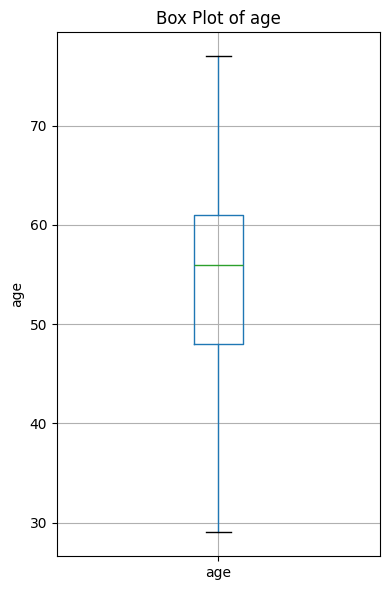

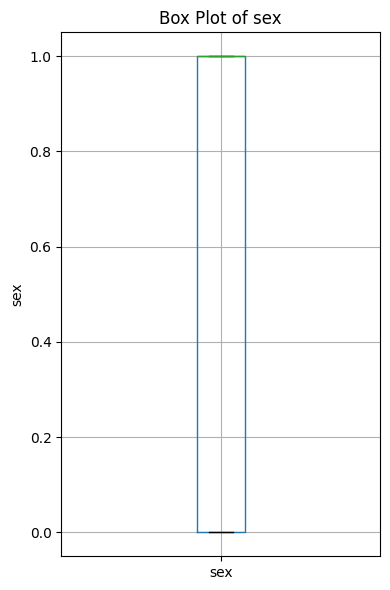

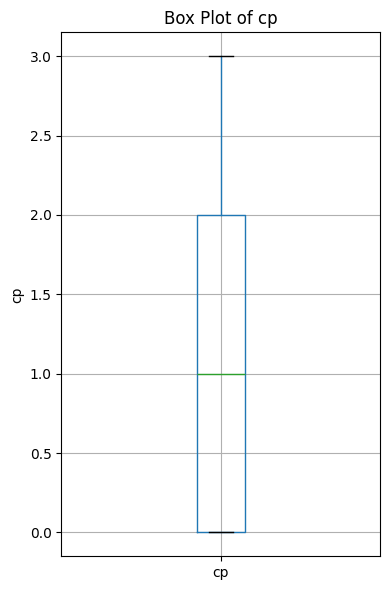

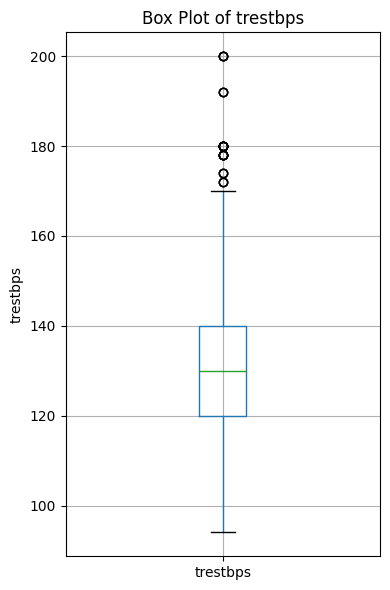

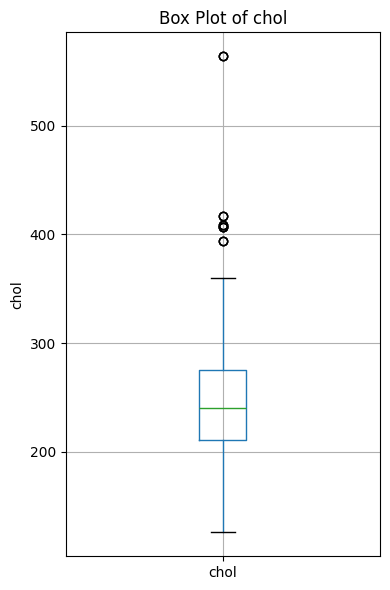

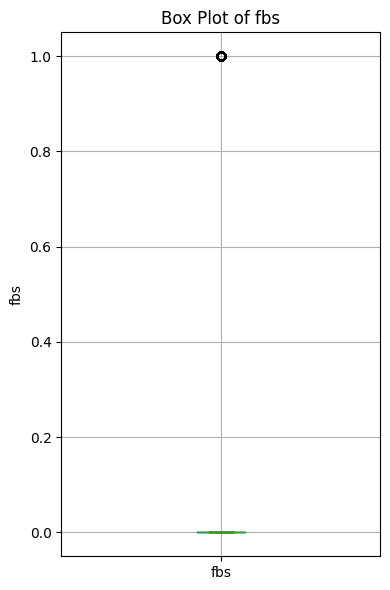

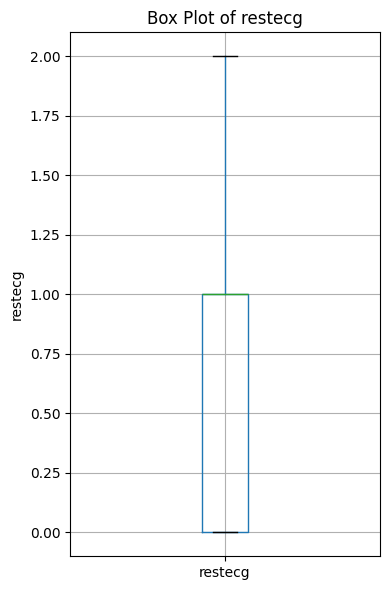

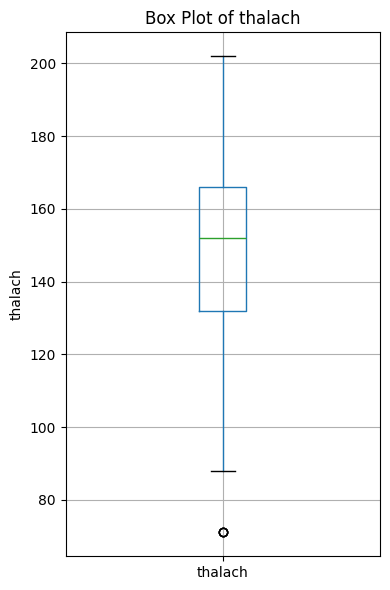

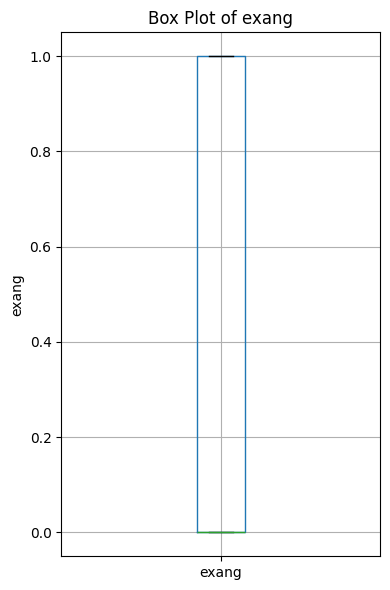

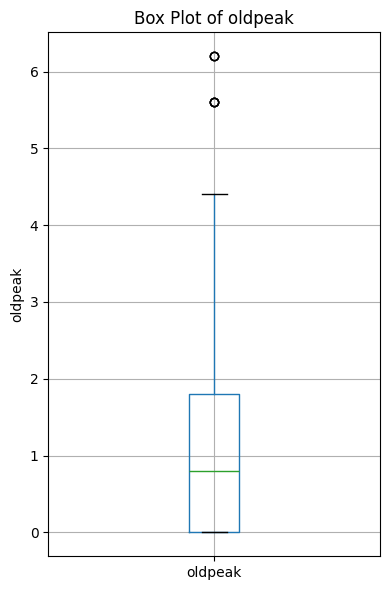

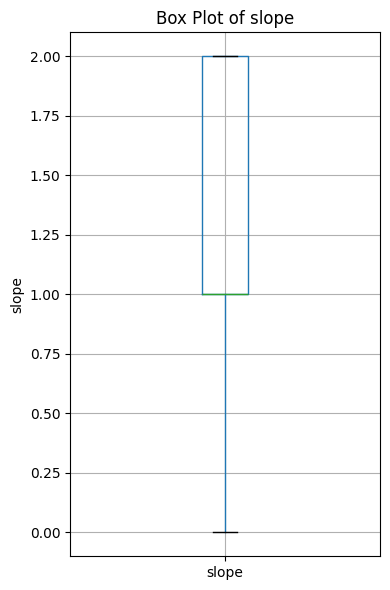

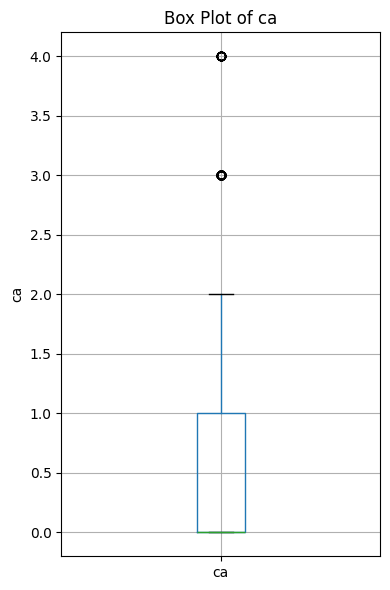

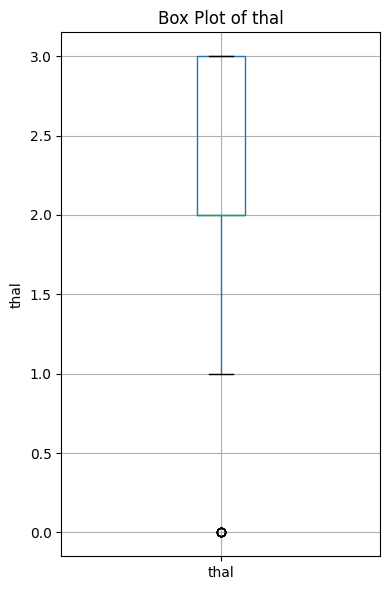

In [12]:
numeric_cols = ["age","sex","cp", "trestbps", "chol","fbs","restecg", "thalach","exang", "oldpeak", "slope","ca","thal"]

for col in numeric_cols:
    plt.figure(figsize=(4, 6)) # Initializes a new figure for plotting.
    # Method A: using DataFrame.boxplot
    df.boxplot(column=col) # Plots a box plot for the column
    # Or equivalently: plt.boxplot(df[col], labels=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.tight_layout()  # adjusts subplot parameters (marhins, paddings) so that axes labels, titles and tick labels don't overlap
    plt.show()

In [13]:
# Outlier Removal using IQR method
def remove_outliers_iqr(df, cols, factor=1.5):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = ["age","sex","cp", "trestbps", "chol","fbs","restecg", "thalach","exang", "oldpeak", "slope","ca","thal","target"]
df = remove_outliers_iqr(df, numeric_cols)
print("After outlier removal:", df.shape)

After outlier removal: (769, 14)


When you then draw a boxplot on that cleaned DataFrame again, matplotlib recomputes whiskers (again at ±1.5×IQR of whatever remains), so any points beyond those newly computed bounds still get flagged as outliers.


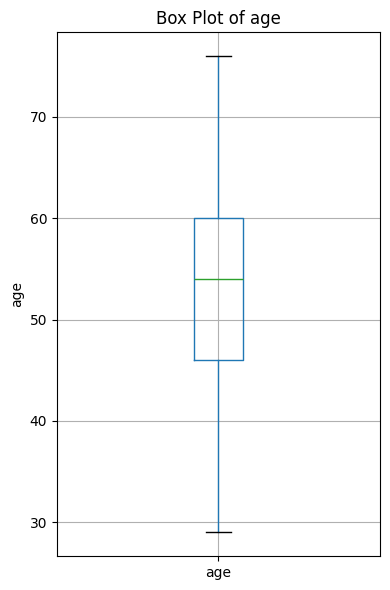

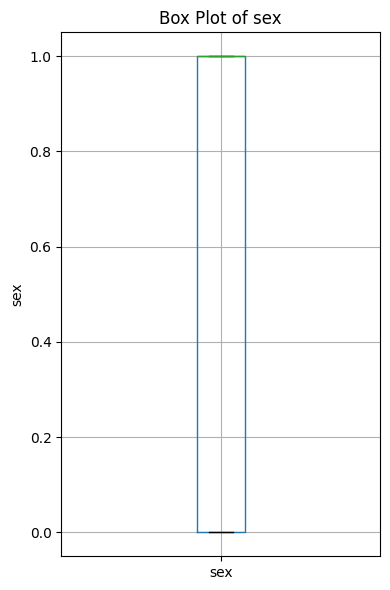

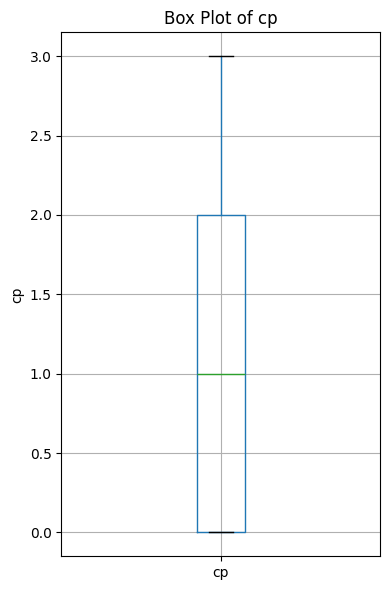

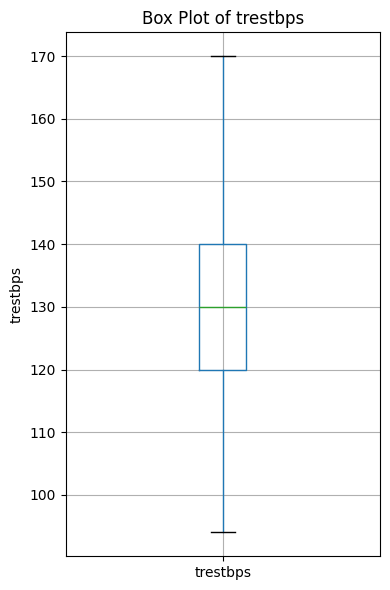

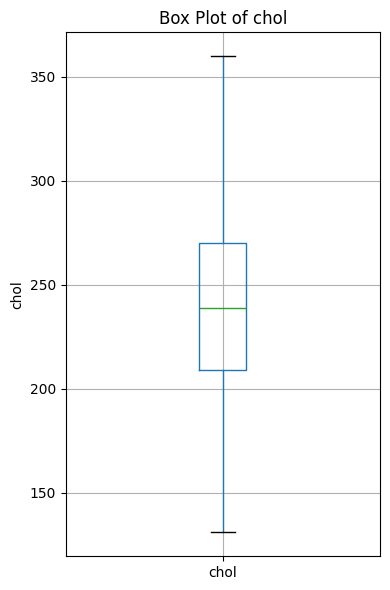

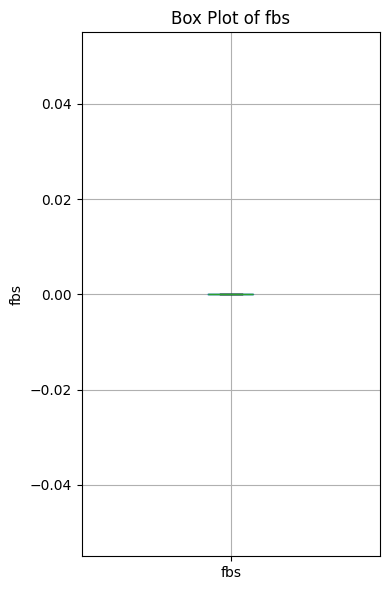

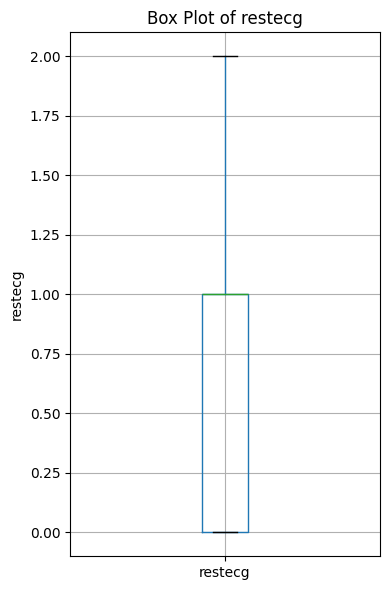

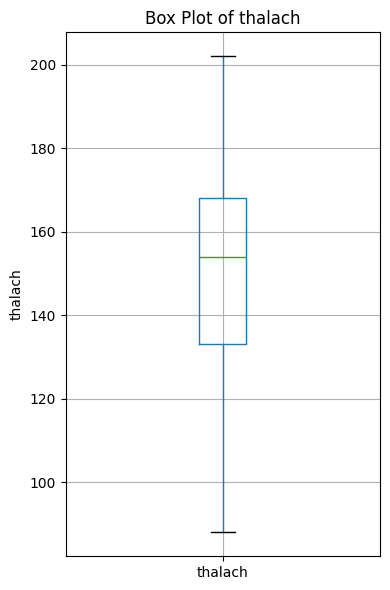

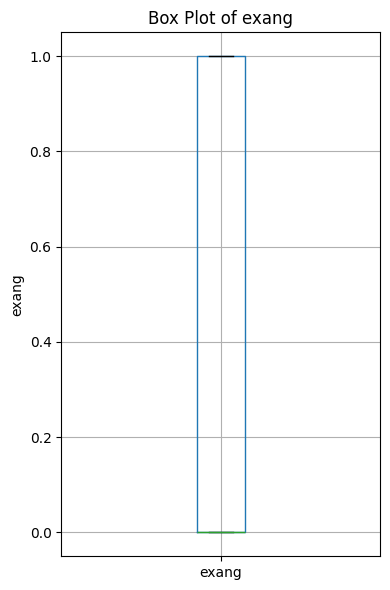

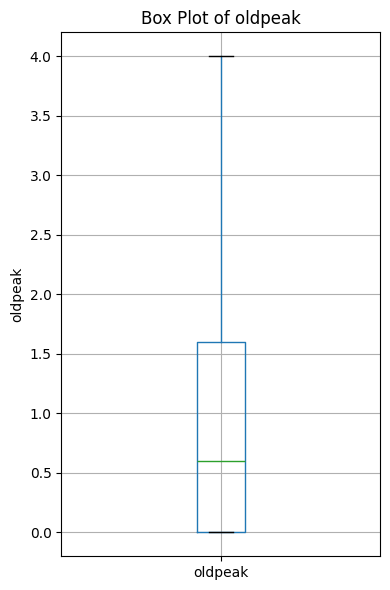

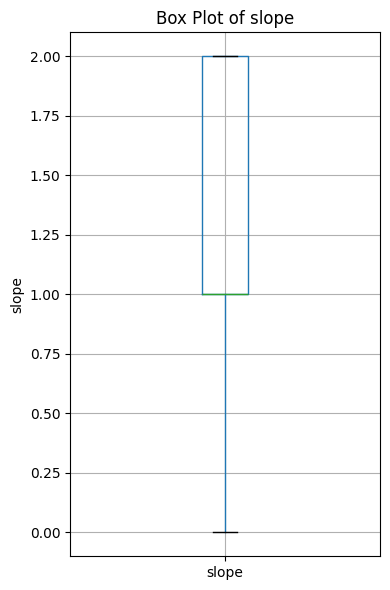

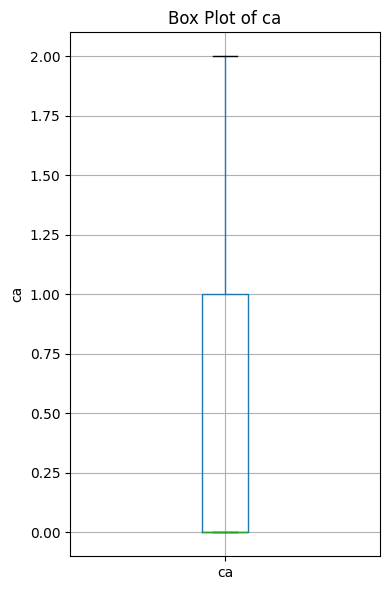

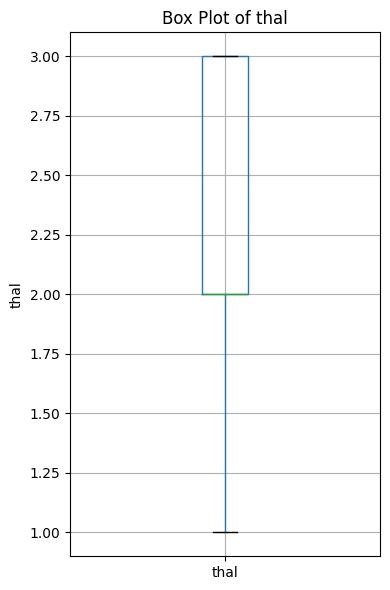

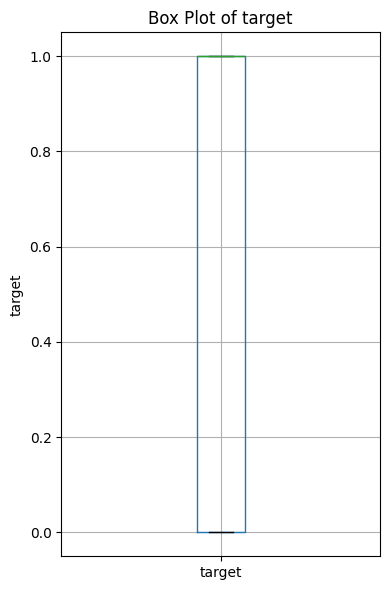

In [14]:
numeric_cols = ["age","sex","cp", "trestbps", "chol","fbs","restecg", "thalach","exang", "oldpeak", "slope","ca","thal","target"]

for col in numeric_cols:
    plt.figure(figsize=(4, 6))
    # Method A: using DataFrame.boxplot
    df.boxplot(column=col)
    # Or equivalently: plt.boxplot(df[col], labels=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.tight_layout() 
    plt.show()

<h1>Data Transformation</h1>

In [15]:
heart_df = df.copy()
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<hr>
For each value in cp column - looks up a string in cp_map<br>
Creates new column cp_desc with the name 

In [16]:
# Type Conversion & Mapping
heart_df["age"]   = heart_df["age"].astype(float)   # example of astype()

# map sex 0/1 → 'F'/'M'
heart_df["sex"] = heart_df["sex"].map({0: "F", 1: "M"})
# map cp codes → descriptive labels
cp_map = {1:"typical", 2:"atypical", 3:"non-anginal", 4:"asymptomatic"}
heart_df["cp_desc"] = heart_df["cp"].map(cp_map)

heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_desc
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0,NaN
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0,NaN
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0,NaN
5,58.0,F,0,100,248,0,0,122,0,1.0,1,0,2,1,NaN
7,55.0,M,0,160,289,0,0,145,1,0.8,1,1,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,M,1,140,221,0,1,164,1,0.0,2,0,2,1,typical
1021,60.0,M,0,125,258,0,0,141,1,2.8,1,1,3,0,NaN
1022,47.0,M,0,110,275,0,0,118,1,1.0,1,1,2,0,NaN
1023,50.0,F,0,110,254,0,0,159,0,0.0,2,0,2,1,NaN


<h1>Build Data model using regression and kNN methods and compare accuracy of
heart disease prediction</h1>

## One-Hot encoding
Turns signle categorical column(with k distinct values) into k binary(0/1 or True/False) columns - one per category<br>
This lets ML algorithms treat categories as separate, unordered features rather than as numeric codes<br>

<hr>
get_dummies() - creates dummy variables from categorical variables<br>
&emsp;columns: list of column names to encode<br>
&emsp;drop_first - default False<br>
&emsp;&emsp;True - drops the first category and only creates k-1 dummies - to avoid the dummy-variable-trap(perfect multicolinearity)<br>
<hr>
If you leave a column as text ("typical", "atypical", …) or integer codes (1,2,3,4), the algorithm will either fail or treat those codes as ordinal numbers—which they aren’t - problem in knn<br>
Logistic Regression finds a weighted sum of inputs. If you leave categories as a single integer, you’re forcing a linear ramp across categories

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
# one-hot encode categorical
df = pd.get_dummies(df, columns=["cp","restecg","slope","thal","fbs","exang"], 
                    drop_first=True)
df

,age,sex,trestbps,chol,thalach,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3,exang_1
0,52,1,125,212,168,1.0,2,0,False,False,False,True,False,False,True,False,True,False
2,70,1,145,174,125,2.6,0,0,False,False,False,True,False,False,False,False,True,True
3,61,1,148,203,161,0.0,1,0,False,False,False,True,False,False,True,False,True,False
5,58,0,100,248,122,1.0,0,1,False,False,False,False,False,True,False,True,False,False
7,55,1,160,289,145,0.8,1,0,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,0,1,True,False,False,True,False,False,True,True,False,True
1021,60,1,125,258,141,2.8,1,0,False,False,False,False,False,True,False,False,True,True
1022,47,1,110,275,118,1.0,1,0,False,False,False,False,False,True,False,True,False,True
1023,50,0,110,254,159,0.0,0,1,False,False,False,False,False,False,True,True,False,False


<hr>
Scale numeric features - <br>
&emsp;k-Nearest Neighbors uses distance metrics—features on large scales will dominate<br>
&emsp;Logistic Regression and other gradient-based models converge faster when inputs have mean≈0 and variance≈1<br>
<hr>
StandardScaler - transformer that standardizes features by removing the mean and scaling to unit variance<br>

In [19]:
numeric_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,age,sex,trestbps,chol,thalach,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3,exang_1
0,-0.155300,1,-0.240805,-0.675971,0.768418,0.026266,2.134054,0,False,False,False,True,False,False,True,False,True,False
2,1.797168,1,1.066034,-1.530053,-1.138183,1.550693,-0.702744,0,False,False,False,True,False,False,False,False,True,True
3,0.820934,1,1.262060,-0.878254,0.458041,-0.926501,0.715655,0,False,False,False,True,False,False,True,False,True,False
5,0.495523,0,-1.874354,0.133160,-1.271202,0.026266,-0.702744,1,False,False,False,False,False,True,False,True,False,False
7,0.170111,1,2.046163,1.054670,-0.251392,-0.164287,0.715655,0,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.603993,1,0.739324,-0.473688,0.591060,-0.926501,-0.702744,1,True,False,False,True,False,False,True,True,False,True
1021,0.712463,1,-0.240805,0.357919,-0.428750,1.741247,0.715655,0,False,False,False,False,False,True,False,False,True,True
1022,-0.697653,1,-1.220934,0.740008,-1.448560,0.026266,0.715655,0,False,False,False,False,False,True,False,True,False,True
1023,-0.372241,0,-1.220934,0.268015,0.369362,-0.926501,-0.702744,1,False,False,False,False,False,False,True,True,False,False


<hr>
df["num"]>0 - produces True?false if raw "num" indicates disease presence<br>
Then we drop num column

In [20]:
X = df.drop("target", axis=1)
y = df["target"]
X

,age,sex,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3,exang_1
0,-0.155300,1,-0.240805,-0.675971,0.768418,0.026266,2.134054,False,False,False,True,False,False,True,False,True,False
2,1.797168,1,1.066034,-1.530053,-1.138183,1.550693,-0.702744,False,False,False,True,False,False,False,False,True,True
3,0.820934,1,1.262060,-0.878254,0.458041,-0.926501,0.715655,False,False,False,True,False,False,True,False,True,False
5,0.495523,0,-1.874354,0.133160,-1.271202,0.026266,-0.702744,False,False,False,False,False,True,False,True,False,False
7,0.170111,1,2.046163,1.054670,-0.251392,-0.164287,0.715655,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.603993,1,0.739324,-0.473688,0.591060,-0.926501,-0.702744,True,False,False,True,False,False,True,True,False,True
1021,0.712463,1,-0.240805,0.357919,-0.428750,1.741247,0.715655,False,False,False,False,False,True,False,False,True,True
1022,-0.697653,1,-1.220934,0.740008,-1.448560,0.026266,0.715655,False,False,False,False,False,True,False,True,False,True
1023,-0.372241,0,-1.220934,0.268015,0.369362,-0.926501,-0.702744,False,False,False,False,False,False,True,True,False,False


In [21]:
y

0       0
2       0
3       0
5       1
7       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 769, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Logistic Regression
Logistic Regression is a supervised machine learning algorithm used for classification problems, especially binary classification (i.e., problems with two possible outcomes like Yes/No, 0/1, True/False)<br>
While linear regression predicts continuous values, logistic regression predicts probabilities. These probabilities are then converted into class labels (like 0 or 1)<br>


## KNN
KNN is a supervised machine learning algorithm used for both classification and regression, but it's more commonly used for classification<br>

Choose a value for K → (e.g., K = 3 means we’ll look at the 3 nearest neighbors)<br>
Calculate distances → Use a distance metric like Euclidean distance to measure how close data points are<br>
Find the K nearest neighbors → Based on the distance, pick the K closest training data points to the new input<br>
Vote (for classification) → Check the most frequent class among the K neighbors and assign that class to the input point<br>
&emsp;OR<br>
Take the average (for regression) → Predict the value based on the average of K neighbors’ outputs<br>




In [23]:
regression = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
predict_regression = regression.predict(X_test)

In [26]:
predict_regression

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [27]:
accuracy_score(y_test, predict_regression)

0.8528138528138528

In [28]:
print(classification_report(y_test, predict_regression, target_names=["Disease","No Disease"]))

              precision    recall  f1-score   support

     Disease       0.84      0.83      0.83       104
  No Disease       0.86      0.87      0.87       127

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231



In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
predict_knn = knn.predict(X_test)

In [31]:
accuracy_score(y_test, predict_knn)

0.8354978354978355

In [32]:
print(classification_report(y_test, predict_knn, target_names=["Disease", "No Disease"]))

              precision    recall  f1-score   support

     Disease       0.84      0.79      0.81       104
  No Disease       0.83      0.87      0.85       127

    accuracy                           0.84       231
   macro avg       0.84      0.83      0.83       231
weighted avg       0.84      0.84      0.83       231

